<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Student_ID           500 non-null    int64  
 1   Age                  500 non-null    int64  
 2   Gender               500 non-null    object 
 3   University_Year      500 non-null    object 
 4   Sleep_Status         500 non-null    object 
 5   Sleep_Duration       498 non-null    float64
 6   Study_Hours          499 non-null    float64
 7   Screen_Time          498 non-null    float64
 8   Caffeine_Intake      499 non-null    float64
 9   Physical_Activity    497 non-null    float64
 10  Sleep_Quality        499 non-null    float64
 11  Weekday_Sleep_Start  497 non-null    float64
 12  Weekend_Sleep_Start  498 non-null    float64
 13  Weekday_Sleep_End    500 non-null    float64
 14  Weekend_Sleep_End    500 non-null    float64
dtypes: float64(10), int64(2), object(3)
memo

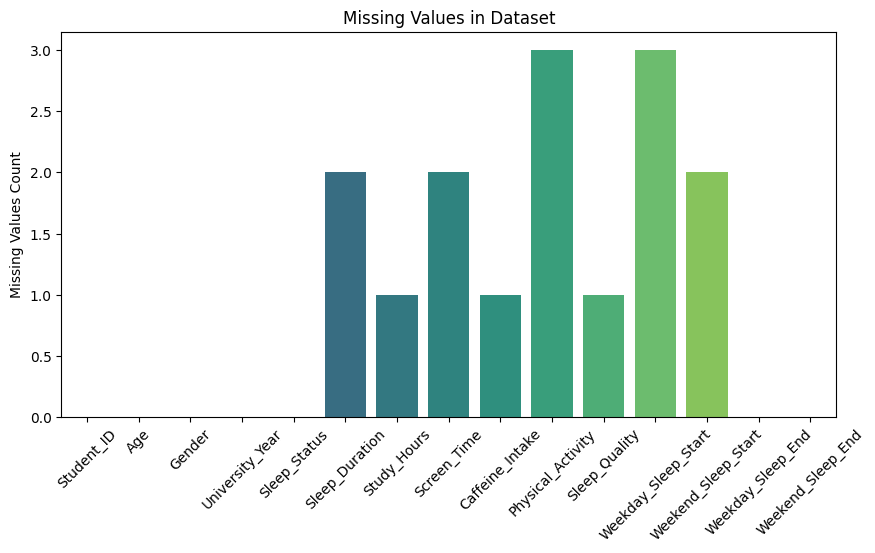

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv('student_sleep.csv')

# Display basic info
print("Dataset Info:\n", df.info())

# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing Values:\n", missing_values)

# Plot missing values
plt.figure(figsize=(10, 5))
sns.barplot(x=missing_values.index, y=missing_values.values, palette="viridis")
plt.xticks(rotation=45)
plt.ylabel("Missing Values Count")
plt.title("Missing Values in Dataset")
plt.show()


In [6]:
# Handling missing values
from sklearn.impute import SimpleImputer
df = pd.read_csv("student_sleep.csv")
print("\nMissing values before handling:")
print(df.isnull().sum())

# Numerical missing values
num= SimpleImputer(strategy='mean')
df[df.select_dtypes(include=[np.number]).columns] = num.fit_transform(df.select_dtypes(include=[np.number]))

# Categorical missing values
cat= SimpleImputer(strategy='most_frequent')
df[df.select_dtypes(include=["object"]).columns] = cat.fit_transform(df.select_dtypes(include=["object"]))

print("\nMissing values after handling:")
print(df.isnull().sum())



Missing values before handling:
Student_ID             0
Age                    0
Gender                 0
University_Year        0
Sleep_Status           0
Sleep_Duration         2
Study_Hours            1
Screen_Time            2
Caffeine_Intake        1
Physical_Activity      3
Sleep_Quality          1
Weekday_Sleep_Start    3
Weekend_Sleep_Start    2
Weekday_Sleep_End      0
Weekend_Sleep_End      0
dtype: int64

Missing values after handling:
Student_ID             0
Age                    0
Gender                 0
University_Year        0
Sleep_Status           0
Sleep_Duration         0
Study_Hours            0
Screen_Time            0
Caffeine_Intake        0
Physical_Activity      0
Sleep_Quality          0
Weekday_Sleep_Start    0
Weekend_Sleep_Start    0
Weekday_Sleep_End      0
Weekend_Sleep_End      0
dtype: int64


In [10]:
scaler = StandardScaler()
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
print("\nData after standardization:")
print(df.head())


Data after standardization:
   Student_ID       Age Gender University_Year Sleep_Status  Sleep_Duration  \
0   -1.728590  1.057140  Other        2nd Year          Yes        0.829819   
1   -1.721662 -0.229962   Male        1st Year          Yes       -0.114598   
2   -1.714734  0.199072   Male        4th Year          Yes       -0.924099   
3   -1.707806  1.057140  Other        4th Year          Yes       -0.114598   
4   -1.700877 -0.658997   Male        4th Year           No       -1.193932   

   Study_Hours  Screen_Time  Caffeine_Intake  Physical_Activity  \
0     0.556351     1.017407        -0.274282      -7.224901e-01   
1     0.008096    -0.735772         1.510934       3.310243e-01   
2     0.210084     1.601800         1.510934       2.023154e-16   
3     0.758339     0.316135         0.915862      -2.099696e-01   
4    -0.944137     0.199257        -1.464426       6.442313e-01   

   Sleep_Quality  Weekday_Sleep_Start  Weekend_Sleep_Start  Weekday_Sleep_End  \
0       1.56

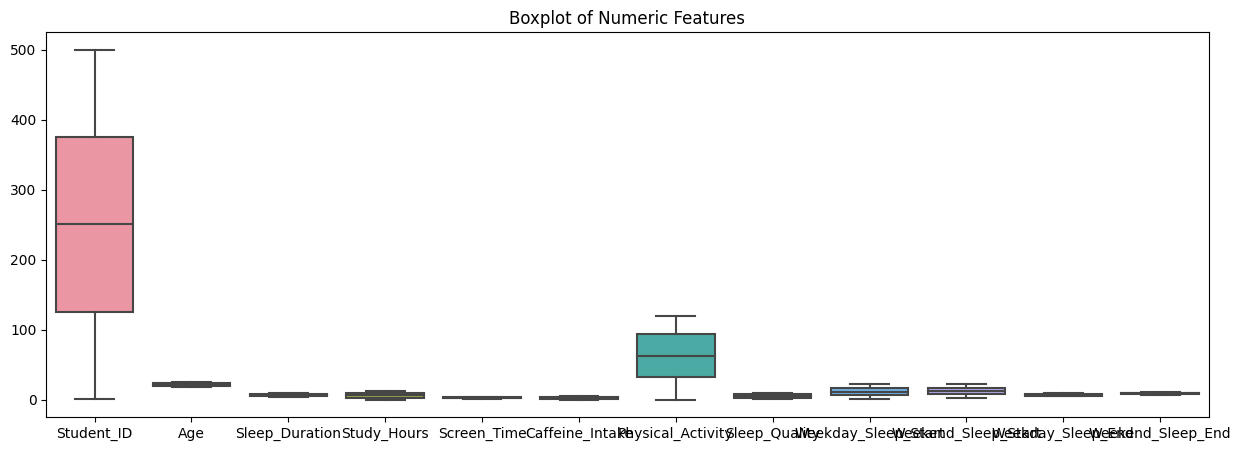


Plotting histograms for numerical columns...


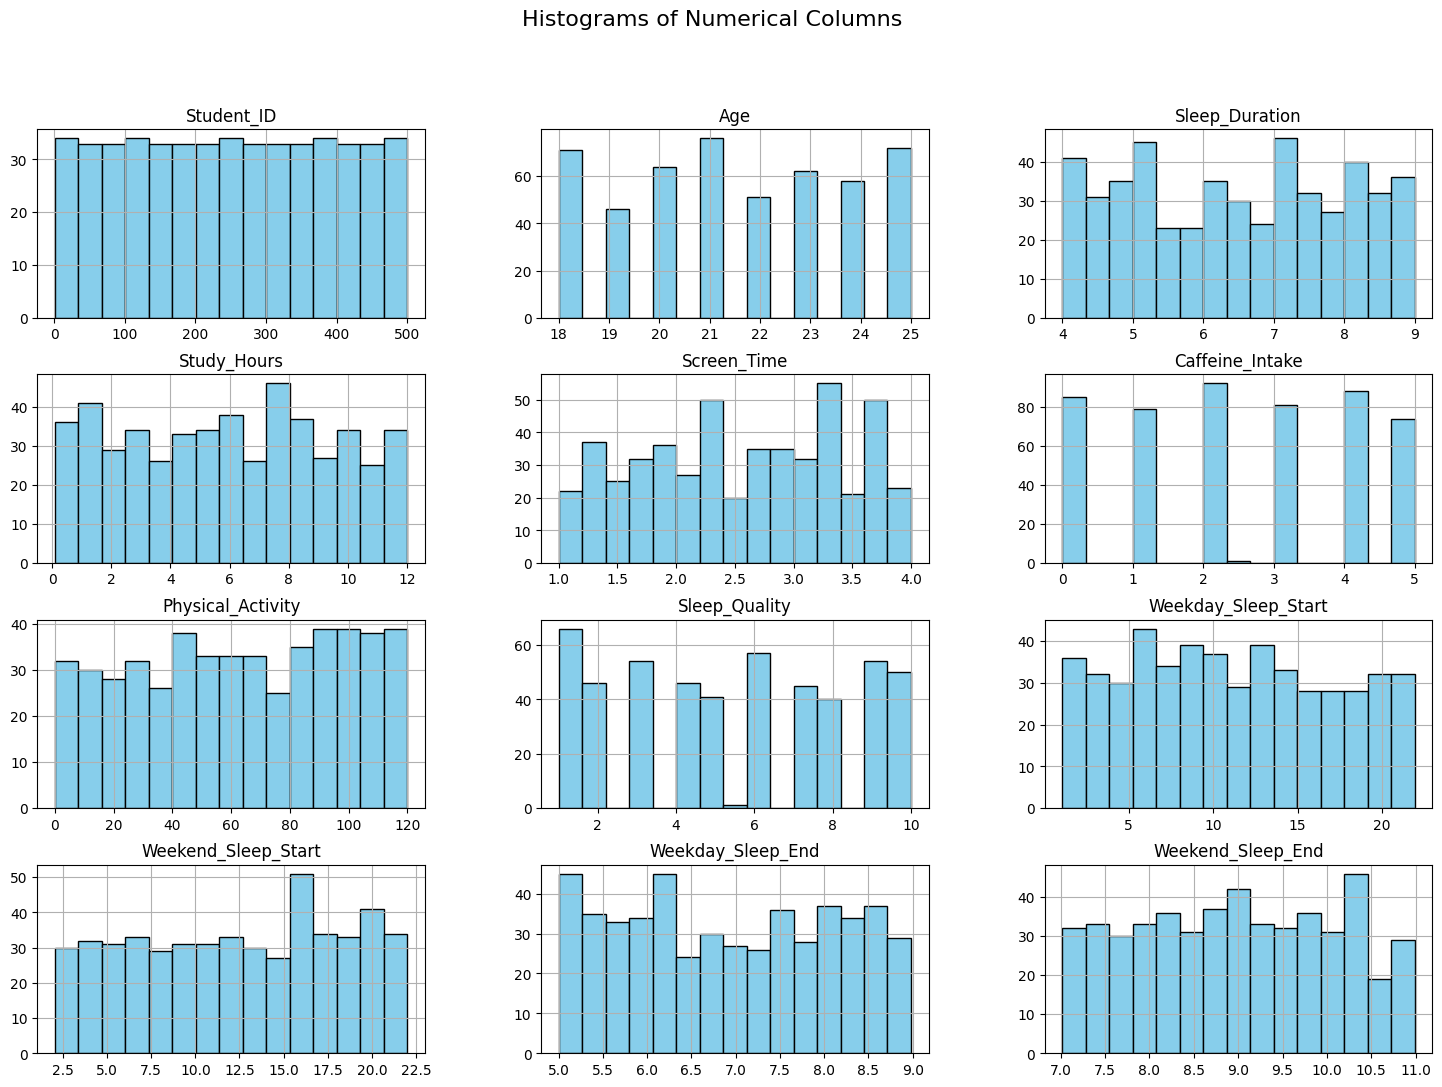


Plotting bar graph for categorical column (Gender)...


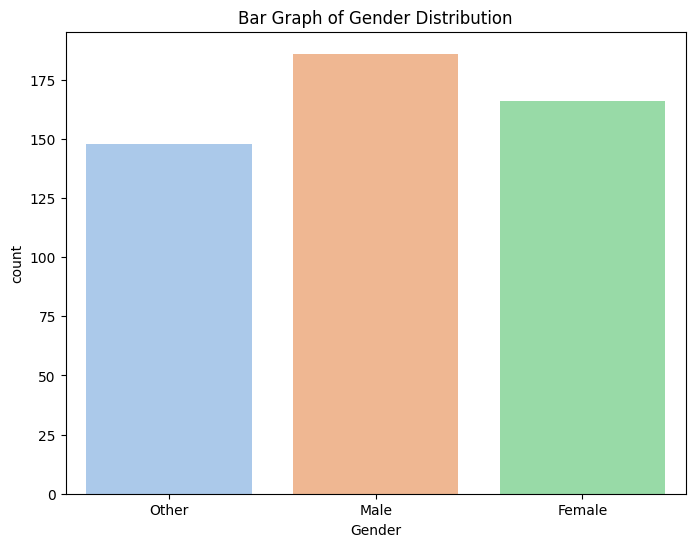

In [7]:
# Univariate Analysis
plt.figure(figsize=(15, 5))
sns.boxplot(data=df)
plt.title("Boxplot of Numeric Features")
plt.show() 

print("\nPlotting histograms for numerical columns...")
df.hist(figsize=(18, 12), bins=15, color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Numerical Columns", fontsize=16)
plt.show()

# Bar graph for categorical column (Gender distribution)
print("\nPlotting bar graph for categorical column (Gender)...")
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=df, palette='pastel')
plt.title("Bar Graph of Gender Distribution")
plt.show()


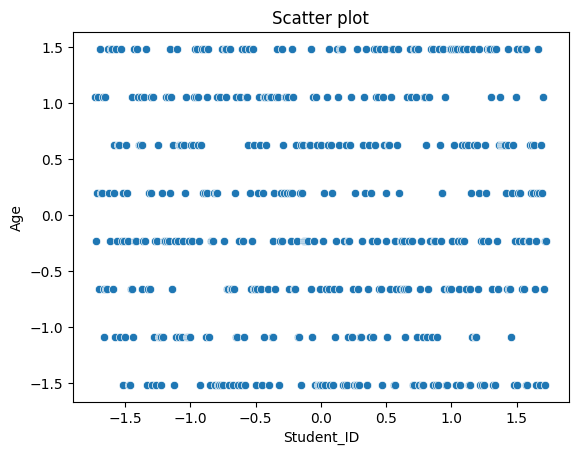

In [11]:
sns.scatterplot(x=df[numeric_cols[0]], y=df[numeric_cols[1]])
plt.xlabel(numeric_cols[0])
plt.ylabel(numeric_cols[1])
plt.title("Scatter plot")
plt.show()


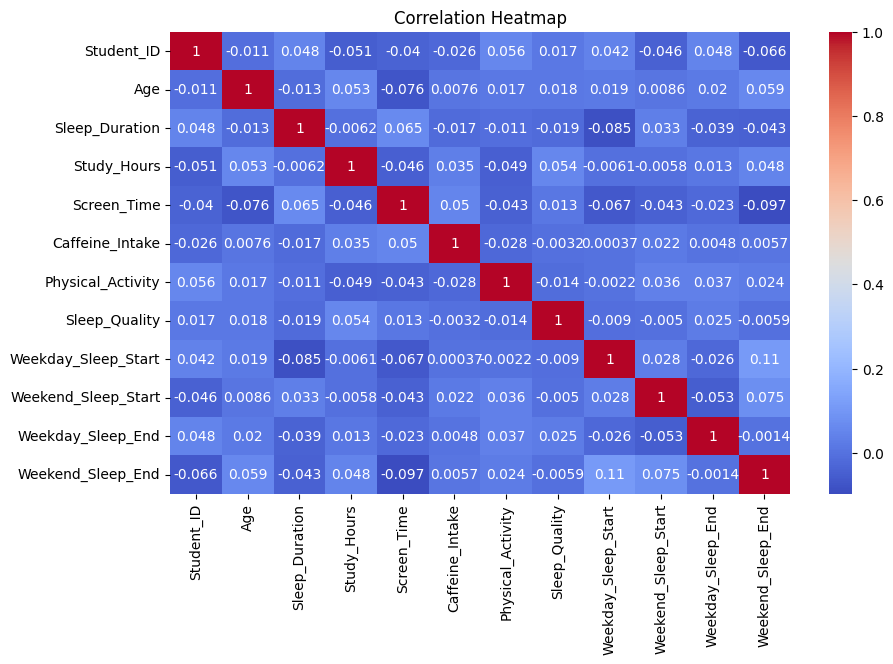

In [12]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
# Encode categorical variables using LabelEncoder
for col in df.select_dtypes(include=['object']).columns:
    df[col] = LabelEncoder().fit_transform(df[col])

print("\nData after encoding categorical features:")
print(df.head())

# Splitting Data
X = df.drop(columns=['Sleep_Status'])  
y = df['Sleep_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



Data after encoding categorical features:
   Student_ID  Age  Gender  University_Year  Sleep_Status  Sleep_Duration  \
0           1   24       2                1             1             7.7   
1           2   21       1                0             1             6.3   
2           3   22       1                3             1             5.1   
3           4   24       2                3             1             6.3   
4           5   20       1                3             0             4.7   

   Study_Hours  Screen_Time  Caffeine_Intake  Physical_Activity  \
0          7.9          3.4              2.0               37.0   
1          6.0          1.9              5.0               74.0   
2          6.7          3.9              5.0                NaN   
3          8.6          2.8              4.0               55.0   
4          2.7          2.7              0.0               85.0   

   Sleep_Quality  Weekday_Sleep_Start  Weekend_Sleep_Start  Weekday_Sleep_End  \
0         

In [1]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Extract MLP-related code cells
mlp_cells = [cell["source"] for cell in notebook_data["cells"] if "MLP" in cell["source"] or "Sequential" in cell["source"]]

# Display the extracted MLP-related code cells
mlp_cells

# Build MLP Model
clf = MLPClassifier(hidden_layer_sizes=(6, 5),
                    activation='relu',
                    solver='adam',
                    random_state=5,
                    verbose=True,
                    max_iter=500,
                    learning_rate_init=0.01)

# Train the model
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

NameError: name 'notebook_data' is not defined

In [19]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

NameError: name 'y_pred' is not defined

In [20]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', 
            xticklabels=label_encoders["AdoptionLikelihood"].classes_, 
            yticklabels=label_encoders["AdoptionLikelihood"].classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


NameError: name 'y_pred' is not defined

<Figure size 600x400 with 0 Axes>

In [21]:
plt.figure(figsize=(8,5))
plt.plot(range(1, len(clf.loss_curve_) + 1), clf.loss_curve_, label="Training Loss", color='blue')

# Mark every 50th iteration
for i in range(0, len(clf.loss_curve_), 50):
    plt.scatter(i+1, clf.loss_curve_[i], color='red', marker='o')

plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("MLP Training Loss Curve")
plt.legend()
plt.grid()
plt.show()


AttributeError: 'MLPClassifier' object has no attribute 'loss_curve_'

<Figure size 800x500 with 0 Axes>